# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [17]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

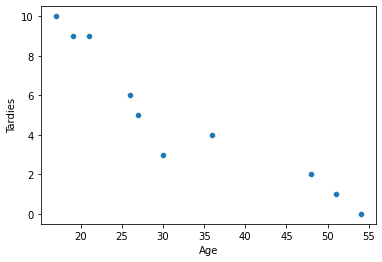

In [18]:
# Your code here.
sns.scatterplot(x=student_data['Age'], y=student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# It looks like there is negative relation, as older you are as less the arrive late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [23]:
# Your response here.
student_data.corr()
# As we have said by looking to the plot, there is a very significant negative relation between this two variables.

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [22]:
student_data.cov()
# A negative covariance means that wen a variable increase, the other one decrease.

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [61]:
# Your response here.
results = smf.ols('Tardies ~ Age', data=student_data).fit()
results.summary()
# Tardies = 12.8888 -0.2428 * Age

C:\Users\mdiez\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        22:01:36   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

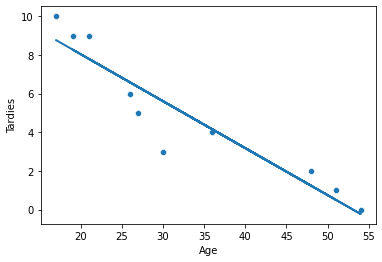

In [67]:
fig, ax1 = plt.subplots(1, 1)

# mi ajuste lineal
y = 12.8888 -0.2428 * student_data['Age']

# pintar los puntos
sns.scatterplot(x=student_data['Age'], y=student_data['Tardies'])

# pintar la recta del ajuste
ax1.plot(student_data['Age'], y, lw=2)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# Our model explains that 88% of the change of the tardies can be explained by the age, which is a good approach.
# And by looking to the plot and the age coefficient we can confirm that the variables have a negative relation, as lower is the age greater is the tardies.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [91]:
# Import any libraries you may need & the data
Vehicles = pd.read_csv("vehicles.csv",encoding = "ISO-8859-1")
Vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [92]:
# Your response here. 
CY = np.corrcoef(Vehicles["CO2 Emission Grams/Mile"], Vehicles["Year"])
CY
# There is a low indirect correlation between this two variables, while years increase,CO2 Emission Grams/Mile is reduce.

array([[ 1.       , -0.2222996],
       [-0.2222996,  1.       ]])

In [93]:
CC = np.corrcoef(Vehicles["CO2 Emission Grams/Mile"], Vehicles["Cylinders"])
CC
# There is a direct correlation between this two variables, while the Cylinders increase,CO2 Emission Grams/Mile also increase.

array([[1.        , 0.75239255],
       [0.75239255, 1.        ]])

In [94]:
CF = np.corrcoef(Vehicles["CO2 Emission Grams/Mile"], Vehicles["Fuel Barrels/Year"])
CF
# There is a high direct correlation between this two variables, while the Fuel Barrels/Year increase,CO2 Emission Grams/Mile also increase.

array([[1.        , 0.98618866],
       [0.98618866, 1.        ]])

In [95]:
CCM = np.corrcoef(Vehicles["CO2 Emission Grams/Mile"], Vehicles["Combined MPG"])
CCM
# There is a high indirect correlation between this two variables, while the Fuel Barrels/Year increase,CO2 Emission Grams/Mile decrease.

array([[ 1.        , -0.92622904],
       [-0.92622904,  1.        ]])

In [96]:
CCost = np.corrcoef(Vehicles["CO2 Emission Grams/Mile"], Vehicles["Fuel Cost/Year"])
CCost
# There is a high direct correlation between this two variables, while the Fuel Cost/Year increase,CO2 Emission Grams/Mile also increase.

array([[1.        , 0.93086515],
       [0.93086515, 1.        ]])

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [104]:
%%capture
!pip install statsmodels
!pip install sklearn

In [115]:
Vehicles.rename(columns = {"CO2 Emission Grams/Mile": "CO2_Emission_Grams_Mile","Fuel Barrels/Year":"Fuel_Barrels_Year", "Combined MPG":"Combined_MPG", "Fuel Cost/Year":"Fuel_Cost_Year"}, inplace = True)
Vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel_Barrels_Year,City MPG,Highway MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [116]:
# Your response here. 
# We dont take Year because there is a low correlation
Vehicles2 = smf.ols(" CO2_Emission_Grams_Mile ~ Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year ", data=Vehicles).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [117]:
# Your response here. 
# Our model explains that 98% of the change of the CO2_Emission_Grams_Mile can be explained by our selected variables, which is a very good approach.

Vehicles2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 4.470e+05
Date:                     Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                             22:13:07   Log-Likelihood:            -1.5226e+05
No. Observations:                    35952   AIC:                         3.045e+05
Df Residuals:                        35947   BIC:                         3.046e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           131.1563      1.688     77.714      0.000     127.848     134.464
Cylinders             1.0448      0.080     12.993      0.000       0.887       1.202
Fuel_Barrels_Year    19.6271      0.060    329.809      0.000      19.510      19.744
Combined_MPG         -3.1666      0.043    -73.810      0.000      -3.251      -3.082
Fuel_Cost_Year        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

I will analize the relation between people Invited and people attended and the relation between people invited an unable to go

### Invited and Attended

In [135]:
# Your code here. 
Party = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
Party

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='Invited', ylabel='Attended'>

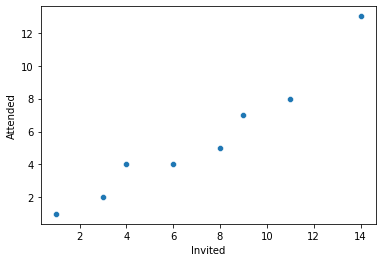

In [136]:
# Your code here.
sns.scatterplot(x=Party['Invited'], y=Party['Attended'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [137]:
# Your response here. 
results = smf.ols('Attended ~ Invited', data=Party).fit()
results.summary()
# In the following summary we can see that intercept |t| is bigger than P so it is a not usefull value.
# Our model explains that 93% of the change of the number os people attended can be explained by the number of people that are invited.


C:\Users\mdiez\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Attended   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Thu, 15 Apr 2021   Prob (F-statistic):           0.000102
Time:                        22:50:07   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
Invited        0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
y = -0.4394 + 0.8485*Party["Invited"]

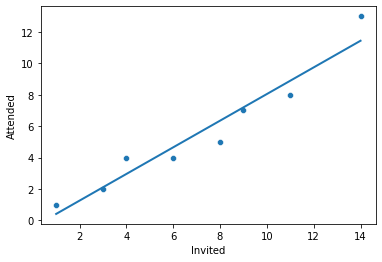

In [139]:
fig, ax1 = plt.subplots(1, 1)

# mi ajuste lineal
y = -0.4394 + 0.8485*Party["Invited"]

# pintar los puntos
sns.scatterplot(x=Party['Invited'], y=Party['Attended'])

# pintar la recta del ajuste
ax1.plot(Party["Invited"], y, lw=2)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

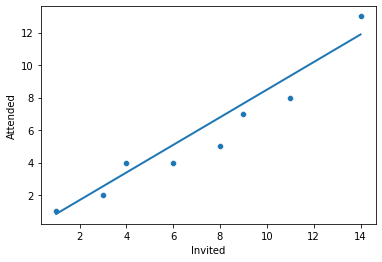

In [140]:
# Your response here. 
#we repeat the exercise by not using the intercept

fig, ax1 = plt.subplots(1, 1)

# mi ajuste lineal
y = 0.8485*Party["Invited"]

# pintar los puntos
sns.scatterplot(x=Party['Invited'], y=Party['Attended'])

# pintar la recta del ajuste
ax1.plot(Party["Invited"], y, lw=2)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# The line is located mone in de middle of the points

### Invited and Unable

In [141]:
Party["Unable"] = Party["Invited"] - Party["Attended"]
Party

,Invited,Attended,Unable
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


<AxesSubplot:xlabel='Invited', ylabel='Unable'>

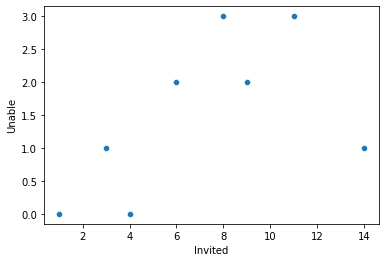

In [142]:
sns.scatterplot(x=Party['Invited'], y=Party['Unable'])
# There is no visual relation between this to variables

In [144]:
results2 = smf.ols('Attended ~ Unable', data=Party).fit()
results2.summary()
# And our model do not explain much os the relation between our variables.

C:\Users\mdiez\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Attended   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.6522
Date:                Thu, 15 Apr 2021   Prob (F-statistic):              0.450
Time:                        22:50:31   Log-Likelihood:                -21.121
No. Observations:                   8   AIC:                             46.24
Df Residuals:                       6   BIC:                             46.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0000      2.317      1.727      0.135      -1.669       9.669
Unable         1.0000      1.238      0.808      0.450      -2.030       4.030
==============================================================================
Omnibus:                        9.362   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                3.073
Skew:                           1.423   Prob(JB):                        0.215
Kurtosis:                       4.057   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""